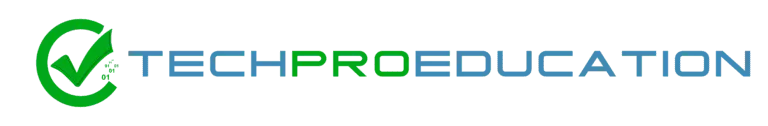

# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [61]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [62]:
nadia = cv2.imread('Nadia_Murad.jpg',0)
denis = cv2.imread('Denis_Mukwege.jpg',0)
solvay = cv2.imread('solvay_conference.jpg',0)
family = cv2.imread('task.jpg',0)

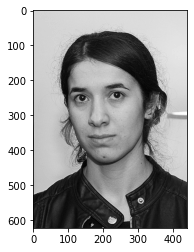

In [63]:
plt.imshow(nadia,cmap='gray')

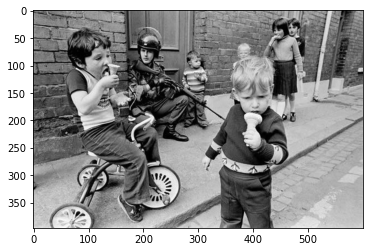

In [64]:
plt.imshow(family,cmap='gray')

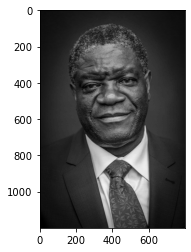

In [65]:
plt.imshow(denis,cmap='gray')

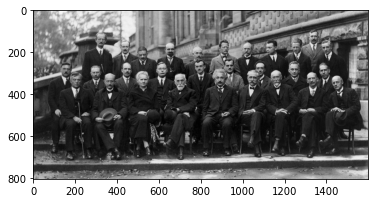

In [66]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [67]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [68]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [69]:
result = detect_face(denis)

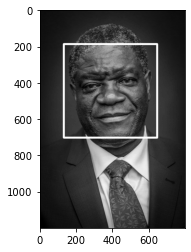

In [70]:
plt.imshow(result,cmap='gray')

In [71]:
result = detect_face(family)

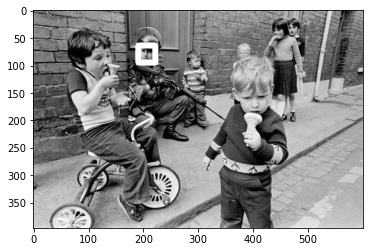

In [72]:
plt.imshow(result,cmap='gray')

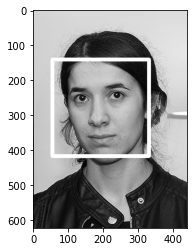

In [51]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

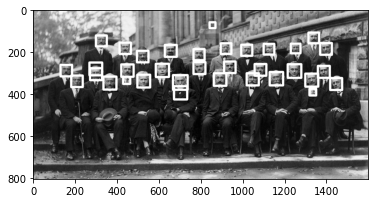

In [52]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [53]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

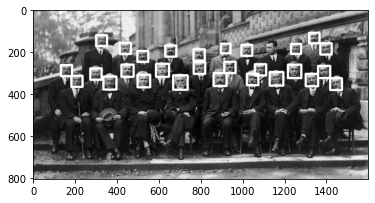

In [54]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [55]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [56]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

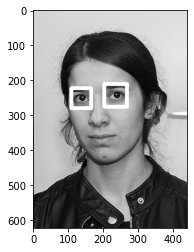

In [57]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

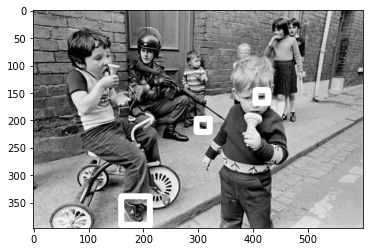

In [58]:
result = detect_eyes(family)
plt.imshow(result,cmap='gray')

In [59]:
eyes = eye_cascade.detectMultiScale(denis) 

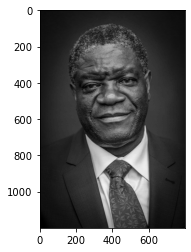

In [60]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

In [24]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1274: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
